In [338]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_GMM_flagged.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_flag = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_flag[:,i] = np.asarray(temp).flatten()


In [551]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_raw_flag.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_raw_flag = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_raw_flag[:,i] = np.asarray(temp).flatten()


In [364]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_GMM_flagged_real.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_flag_r = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_flag_r[:,i] = np.asarray(temp).flatten()


In [681]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_GMM_flagged_all.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_flag_all = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_flag_all[:,i] = np.asarray(temp).flatten()


In [757]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_real.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_real = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_real[:,i] = np.asarray(temp).flatten()


In [646]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_phase.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_phase = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_phase[:,i] = np.asarray(temp).flatten()


In [488]:
import h5py
import numpy as np
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_imag.h5', 'r') as f:
    data_flag = f['rawdata']
    keys_flag = (list(data_flag.keys()))
    x_imag = np.empty([1100000,84])
    
    for i,n in enumerate(keys_flag):
        temp = data_flag.get(n)
        x_imag[:,i] = np.asarray(temp).flatten()


In [342]:
import numpy as np
import h5py
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_abs.h5', 'r') as f:
    data_abs = f['rawdata']
    keys_abs = (list(data_abs.keys()))
    x_abs = np.empty([1100000,84])
    
    for i,n in enumerate(keys_abs):
        temp = data_abs.get(n)
        x_abs[:,i] = np.asarray(temp).flatten()


In [647]:
real_mean = np.mean(x_real, axis=1)
imag_mean = np.mean(x_imag, axis=1)
abs_mean = np.mean(x_abs, axis=1)
phase_mean = np.mean(x_phase, axis=1)

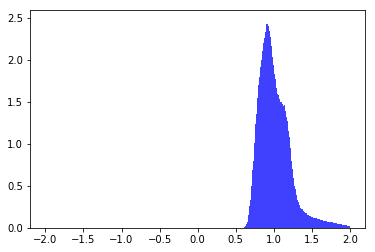

In [663]:
plt.hist(abs_mean, 500, density=True,facecolor='b', alpha=0.75, range = (-2,2))
plt.show()

In [660]:
r = (-2,2)

# Visualising histograms of the the means of complex data over a measurement set

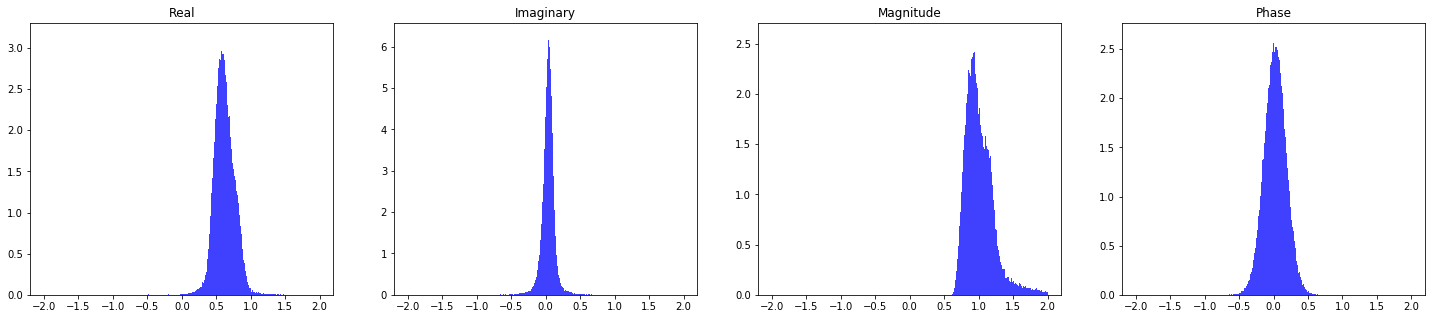

In [666]:
import matplotlib.pyplot as plt
# create figure of specified size
fig = plt.figure(figsize=(25,5))

palette = plt.cm.cubehelix

ax1 = fig.add_subplot(141)
im = ax1.hist(real_mean, 1000, density=True, facecolor='b', alpha=0.75, range=r)
ax1.set_title("Real")

ax2 = fig.add_subplot(142)
im = ax2.hist(imag_mean, 1000, density=True, facecolor='b', alpha=0.75, range=r)
ax2.set_title("Imaginary")

ax3 = fig.add_subplot(143)
im = ax3.hist(abs_mean, 5000, density=True, facecolor='b', alpha=0.75, range=r)
ax3.set_title("Magnitude")

ax4 = fig.add_subplot(144)
im = ax4.hist(phase_mean, 5000, density=True, facecolor='b', alpha=0.75, range=r)
ax4.set_title("Phase")

plt.show(block=True)
fig.savefig('/users/kyle/images/HIST_real_imag_abs.png', bbox_inches='tight')


In [667]:
fig.savefig('/users/kyle/images/mean_hists.png', bbox_inches='tight')


In [641]:
from sklearn.mixture import GaussianMixture
y = x_abs[:,0].reshape(-1, 1)
gmm = GaussianMixture(n_components=3, covariance_type = 'full', verbose=1)

gmm.fit(y)
labels = gmm.predict(y)

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


In [642]:
x = np.linspace(0, 8,num= 1100000)


In [643]:
logprob = gmm.score_samples(x.reshape(-1,1))
responsibilities = gmm.predict_proba(x.reshape(-1,1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]



In [637]:
rfi = x_abs[:,0] * (x_flag[:,0] == 0).astype(int)
ast = x_abs[:,0] * (x_flag[:,0])


In [638]:
rfi = rfi.tolist()
ast = ast.tolist()

In [639]:
rfi[:]= (value for value in rfi if value != 0)
ast[:]= (value for value in ast if value != 0)


# Visualising the fitted Gaussians

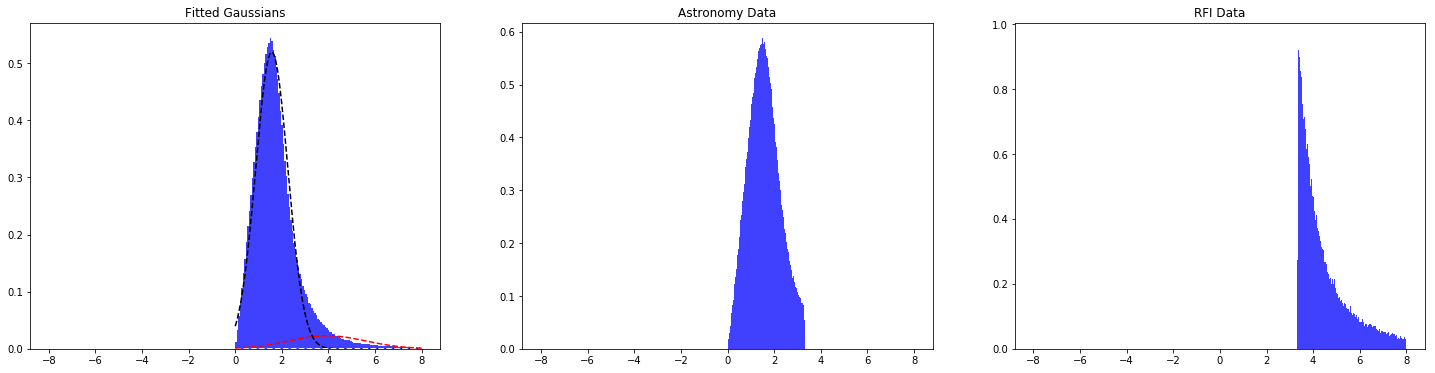

In [645]:
import matplotlib.pyplot as plt
# create figure of specified size
fig = plt.figure(figsize=(25,6))

palette = plt.cm.cubehelix

ax1 = fig.add_subplot(131)
ax1.hist(y.flatten(),  250, facecolor='b', alpha=0.75, density=True, range=(-8,8))
ax1.plot(x, pdf_individual[:,0], '--k')
ax1.plot(x, pdf_individual[:,1], '--w')
ax1.plot(x, pdf_individual[:,2], '--r')
ax1.set_title("Fitted Gaussians")

ax2 = fig.add_subplot(132)
ax2.hist(ast, 500, density=True, facecolor='b', alpha=0.75, range=(-8,8))
ax2.set_title("Astronomy Data")

ax3 = fig.add_subplot(133)
ax3.hist(rfi, 500, density=True, facecolor='b', alpha=0.75, range=(-8,8))
ax3.set_title("RFI Data")

plt.show(block=True)
fig.savefig('/users/kyle/images/hists_rfi_ast.png', bbox_inches='tight')


In [716]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(randi, abso))
rms

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [750]:
from scipy import stats
def iqr(dat, flag_sigma=3.):
    """
    The inter-quartile range (IQR) calculates the distance between the first and last quartiles of data. A quartile is
    just 25% of the data, so the IQR calculates the width of the inner 50% of the data. Remember for a Gaussian
    distribution, 1 sigma covers 66.7% of the data, so the IQR for a Gaussian distribution should be smaller than
    the standard deviation.
    """
    
    # scipy.stats.iqr    
    std = stats.iqr(dat, scale='normal')
    mean = np.mean(dat)
    
    uthresh = mean + flag_sigma*std
    lthresh = mean - flag_sigma*std
    
    # mask_array, plot_distribution() and plot_baseline()    
    mdat = mask_array(dat, lthresh, uthresh)
    
    return(mdat)
    
def mask_array(dat, thresh_low, thresh_high):
    """
    Given an input array, mask points below thresh_low, and above thresh_high
    """
    
    return np.ma.masked_where((dat < thresh_low) | (dat > thresh_high), dat)

In [751]:
iqr_real = iqr(x_abs[:,0])

In [755]:
base = x_abs[:,0] * (x_raw_flag[:,0] == 0)
real = x_abs[:,0] * (x_flag_r[:,0])
abso = x_abs[:,0] * (x_flag[:,0])
randi = x_abs[:,0] *(x_flag_all[:,0] == 0)
absorcomp = x_abs[:,0] *(np.bitwise_or((x_flag[:,0] == 0),(x_flag_all[:,0] == 1))==0)
iqr_abs = x_abs[:,0] *( iqr_real.mask == 0)

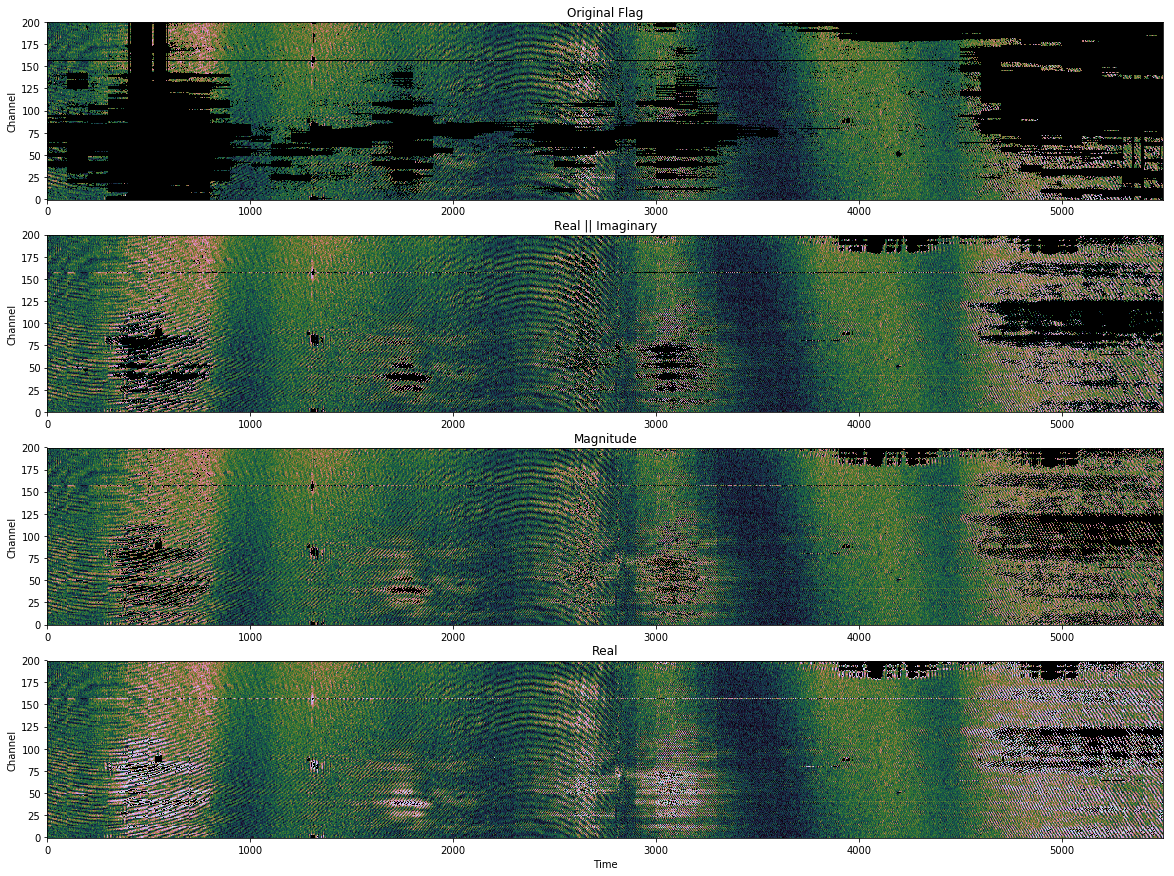

In [756]:
import matplotlib.pyplot as plt
# create figure of specified size
fig = plt.figure(figsize=(20,15))

palette = plt.cm.cubehelix

ax1 = fig.add_subplot(411)
ax1.imshow(np.transpose(base.reshape(5500, 200)), cmap = palette, aspect='auto', vmax=5,vmin=0)
ax1.set_ylabel('Channel')
ax1.set_title('Original Flag')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(412)
ax2.imshow(np.transpose(randi.reshape(5500, 200)), cmap = palette, aspect='auto', vmax=5,vmin=0)
ax2.set_ylabel('Channel')
ax2.set_title('Real || Imaginary')
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(413)
ax3.imshow(np.transpose(abso.reshape(5500, 200)),  cmap = palette, aspect='auto', vmax=5,vmin=0)
ax3.set_ylabel('Channel')
ax3.set_title('Magnitude')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(414)
ax4.imshow(np.transpose(iqr_abs.reshape(5500, 200)),  cmap = palette, aspect='auto',vmax=5,vmin=0)
ax4.set_xlabel('Time')
ax4.set_ylabel('Channel')
ax4.set_title('Real')
plt.gca().invert_yaxis()


plt.show(block=True)
#fig.savefig('/users/kyle/images/all_means.png', bbox_inches='tight')
